In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

In [3]:
# Libraries Settings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
np.set_printoptions(suppress=True)

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [4]:
# plot function
def numerical_plotting(data, col, title, symb, ylabel, color):
    fig, ax = plt.subplots(2, 1, 
                           sharex=True, 
                           figsize=(20, 8),
                           facecolor="#FFFFFF",
                           gridspec_kw={"height_ratios": (.2, .8)})
    
    ax[0].set_facecolor("#FFFFFF")
    ax[1].set_facecolor("#FFFFFF")
    
    ax[0].set_title(title, 
                    weight="bold", 
                    fontsize=30, 
                    pad=30)
    
    sns.boxplot(x=col, 
                data=data,
                color=color,
                ax=ax[0])
    
    ax[0].set(yticks=[])
    
    sns.distplot(data[col], kde=True, color=color)
    
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    
    ax[0].set_xlabel(col, weight="bold", fontsize=15, labelpad=15)
    ax[1].set_xlabel(col, weight="bold", fontsize=15)
    ax[1].set_ylabel(ylabel, weight="bold", fontsize=15)
    
    plt.axvline(data[col].mean(), 
                color='darkgreen', 
                linewidth=2.2, 
                label='mean=' + str(np.round(data[col].mean(),1)) + symb)
    plt.axvline(data[col].median(), 
                color='red', 
                linewidth=2.2, 
                label='median='+ str(np.round(data[col].median(),1)) + symb)
    plt.axvline(data[col].max(), 
                color='blue', 
                linewidth=2.2, 
                label='max='+ str(np.round(data[col].max(),1)) + symb)
    plt.axvline(data[col].min(), 
                color='orange', 
                linewidth=2.2, 
                label='min='+ str(np.round(data[col].min(),1)) + symb)
    plt.axvline(data[col].mode()[0], 
                color='purple', 
                linewidth=2.2, 
                label='mode='+ str(data[col].mode()[0]) + symb)
    
    
    plt.legend(bbox_to_anchor=(1, 1), 
               ncol=1, 
               fontsize=17, 
               fancybox=True, 
               shadow=True, 
               frameon=False)
    
    plt.tight_layout()
    plt.show()
    
def count_pie_plot(datapie, datacount, colpiey, colcount, text1, text2, piecomap,
                   xlabel, ylabel, xticklabel, yticklabel, ystart, yend, pielabels, yplus, 
                   piefs=10, countcomap=None, pctdistance=0.65, fontsize=15, xtickrotation=None):

    # Subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   nrows=1, 
                                   facecolor=("#FFFFFF"),
                                   figsize=(24, 8))

    datapie.plot(kind="pie", 
                 y=colpiey,
                 autopct='%1.1f%%',
                 labels=None,
                 startangle=90,
                 colors=piecomap,
                 wedgeprops=dict(width=0.15),
                 pctdistance=pctdistance,
                 fontsize=piefs,
                 ax=ax1,
                 textprops=dict(color="black", 
                                weight="bold"))
    
    sns.countplot(x=colcount,
                  data=datacount,
                  palette=countcomap,
                  ax=ax2)

    #title
    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()
    
    ax1.text(x0, y1 * 1.40, 
             text1, 
             fontsize=30, 
             ha="left", 
             va="center", 
             weight="bold")
    ax1.text(x0, y1 * 1.25, 
             text2, 
             fontsize=18, 
             ha="left", 
             va="center")
    
    ax1.legend(pielabels, 
               loc="upper left", 
               bbox_to_anchor=(x0*0.01, y1*0.85), 
               prop={'size': 10.5}, frameon=False, ncol=len(datapie))
    
    ax2.set_xlabel(xlabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_ylabel(ylabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_xticklabels(labels=xticklabel,
                        weight="semibold",
                        fontsize=10,
                        rotation=xtickrotation)
    ax2.set_yticklabels(labels=yticklabel,
                        weight="semibold",
                        fontsize=10)

    # data label
    i=0

    for p in ax2.patches:
        value = f"{p.get_height()}"
        if (i < 2):
            y1 = -2
        else:
            y1 = 2
        i += 1
        x = p.get_x() + p.get_width() / 2 
        y = p.get_y() + p.get_height() + yplus
        ax2.text(x, y, value, ha="center", va="center", fontsize=15, weight="semibold") 

    ax2.set_ylim(ystart, yend)
    ax2.set_facecolor("#FFFFFF")
    ax1.set_ylabel(None)
    
    plt.tight_layout()
    return fig

def countplot_y(data, xplus, coly, sizey, text1, text2, 
                xlabel, ylabel, xstart, xend, ytimes1, ytimes2):

    fig, ax = plt.subplots(ncols=1,
                           nrows=1,
                           facecolor=("#FFFFFF"),
                           figsize=(24, sizey))

    sns.countplot(y=coly,
                  data=data,
                  palette=['#E0144C', '#FF5858', '#3AB0FF', '#FFB562', '#6FEDD6', '#6D9885'],
                  ax=ax)

    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()

    ax.text(x0, y1 * ytimes1, 
            text1, fontsize=30, 
            ha="left", va="center", weight="bold")
    ax.text(x0, y1 * ytimes2, 
            text2, fontsize=18, 
            ha="left", va="center")

    plt.xticks(weight="bold",
               fontsize=10)
    plt.yticks(weight="bold",
               fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=25, labelpad=20)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=25, labelpad=20)

    # data label
    i=0

    for p in ax.patches:
        value = f'{p.get_width()}'
        if i < 7:
            x1 = -1.2
        else:
            x1 = 1.2

        i+=1
        x = p.get_x() + p.get_width() + xplus
        y = p.get_y() + p.get_height() -.4
        ax.text(x, y, value, ha='center', va='center', fontsize=15, weight='semibold') 

    plt.tight_layout()
    ax.set_xlim(xstart, xend)
    ax.set_facecolor("#FFFFFF")
    
    return fig

def bivariate_numerical_plot(data, x, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(20, 6), 
                           facecolor="#FFFFFF")
    sns.kdeplot(data=data, 
                x=x, 
                hue=hue, 
                fill=True)
    
    ax.set_facecolor("#FFFFFF")
    
    plt.title(title, weight="bold", 
              fontsize=25, pad=30)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.tight_layout()
    plt.show()
    
def mtvboxplot(data, x, y, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(24, 8))
    sns.boxplot(x=x, y=y, hue=hue, 
                data=data, ax=ax)
    plt.title(title, weight="bold", 
              fontsize=25, pad=25)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.tight_layout()
    plt.show()

In [5]:
# stat function

def spearman_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Spearman's Correlation
    coef, p = stats.spearmanr(data1, data2)
    print(f"Spearmans correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def pearson_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Pearson's Correlation
    coef, p = stats.pearsonr(data1, data2)
    print(f"Pearson correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def skew_kurtosis(data, title):
    skw = stats.skew(data, bias=False)
    kurt = stats.kurtosis(data, bias=False)
    
    print("-" * 20, title, "-" * 20)
    print(f"Skewness: {skw}")
    if (skw < -1) and (skw > 1):
        print("Highly skewed")
    elif (-1 < skw < -0.5) or (1 < skw < 0.5):
        print("Moderately skewed")
    elif (-0.5 < skw < 0.5):
        print("Approximately symmetric")
    print("-" * 35)
    print(f"Kurtosis: {kurt}")
    if (kurt > 1):
        print("The distribution is too peaked")
    elif (kurt < -1):
        print("The distribution is too flat")
    else:
        print("The distribution is non-normal")
    print("-" * 35)
    
def chebychev(data, title, interpret):
    mu = round(data.mean(), 1)
    s = round(data.std(), 1)
    
    fc = round(mu - (2 * s), 1)
    sc = round(mu + (2 * s), 1)
    
    print("-" * 20, f"Interpretation of {title}", "-" * 20)
    print(f"first calc: {fc}")
    print(f"second calc: {sc}")
    print(interpret)
    print("-" * 40)

In [6]:
df = pd.read_csv('data/Training Data.csv')

In [7]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [9]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

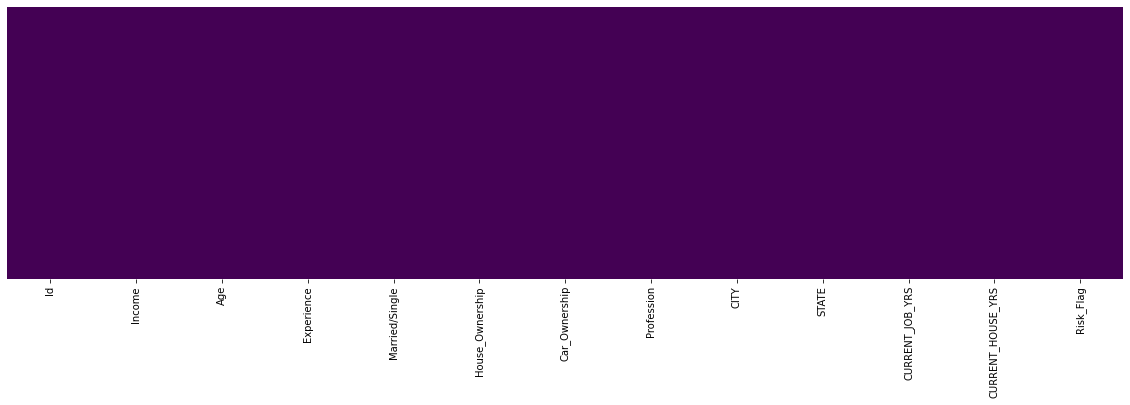

In [10]:
# plotting null values
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


### Uniqueness Categorical Variables
#### Let's have a look at categorical variables. How many unique values of these variables

In [21]:
categorical = df.select_dtypes(["category", "object"]).columns

In [22]:
categorical

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'], dtype='object')

In [23]:
for cat_col in categorical:
    print(f"{cat_col}: {df[cat_col].nunique()} uniqueness variable")

Married/Single: 2 uniqueness variable
House_Ownership: 3 uniqueness variable
Car_Ownership: 2 uniqueness variable
Profession: 51 uniqueness variable
CITY: 317 uniqueness variable
STATE: 29 uniqueness variable


### Discrete and Continuous Variables
##### Let's have a look at Discrete and Continuous variables.

In [28]:
numeric = df.select_dtypes(["int", "float"]).columns

In [29]:
for num_col in numeric:
    print(f"{num_col}: {df[num_col].nunique()} uniqueness variable")

Id: 252000 uniqueness variable
Income: 41920 uniqueness variable
Age: 59 uniqueness variable
Experience: 21 uniqueness variable
CURRENT_JOB_YRS: 15 uniqueness variable
CURRENT_HOUSE_YRS: 5 uniqueness variable
Risk_Flag: 2 uniqueness variable


#### How many missing data points do we have?¶
##### Let's see how many missing data we have in each column....

In [31]:
# Get the number of missing data points per column
missing_values_count = df.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]

Id                 0
Income             0
Age                0
Experience         0
Married/Single     0
House_Ownership    0
Car_Ownership      0
Profession         0
CITY               0
STATE              0
dtype: int64

##### Great! there's no missing value! let's see the unique variables on the categorical data!

In [32]:
df.Profession.unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [33]:
df.CITY.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [34]:
df.STATE.unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

##### Note:
###### We can see above that there are many City names and also State that have a parantheses 
###### bracket characters and numbers that are not clear what they mean, let's clean that up later.

###### This dataset column is very inconsistent and neat, this can cause confusion or typing errors
###### in the future, let's change it so we can more easily analyze and predict it later.

### Data Cleaning